کد یکی از دانش‌آموزان که به عنوان نمونه قرار گرفت

In [16]:
import pandas
import matplotlib.pyplot as plt

In [3]:
df = pandas.read_csv('https://raw.githubusercontent.com/sajadfaghfoor/dataset/main/daily_tickers/%D9%88%D8%B3%D8%A7%D8%AE%D8%AA-%D8%AA.csv')

In [4]:
df

,date,open,high,low,last,close,vol,count,value
0,20010325,875.12,875.0,875.0,875.12,875.12,21000,8,2.100000e+07
1,20010326,875.12,875.0,875.0,875.12,875.12,45000,8,4.500000e+07
2,20010327,875.12,875.0,875.0,875.12,875.12,60000,14,6.000000e+07
3,20010328,875.12,875.0,875.0,875.12,875.12,50000,9,5.000000e+07
4,20010331,875.12,875.0,875.0,875.12,875.12,45000,21,4.500000e+07
...,...,...,...,...,...,...,...,...,...
4427,20210713,49000.00,50140.0,47930.0,49290.00,48680.00,1459965,1081,7.106565e+10
4428,20210714,48180.00,51110.0,48170.0,51110.00,50390.00,1893349,1007,9.539817e+10
4429,20210727,52900.00,52900.0,52900.0,52900.00,52900.00,673626,216,3.563482e+10
4430,20210728,54000.00,55500.0,52050.0,53290.00,54070.00,2807088,2483,1.517755e+11


In [6]:
ma = []
for i in range(200):
    ma.append(None)
for i in range(0,4232):
    av = 0
    for j in range(i,i+200):
        av += df['close'][j]
    ma.append(av)

In [8]:
len(ma)

4432

In [9]:
df["ma"] = ma

In [13]:
sell = df['close'] > df["ma"]
sellState = df[sell].index
buy = df['close'] < df["ma"]
buyState = df[buy].index

In [15]:
saham = 0
money = 100 
max_idx = len(df) - 1
curr_idx = 0

wealthls = []

while curr_idx <= max_idx:
    if curr_idx in sellState:
        money += saham*df.loc[curr_idx, 'close']
        tSaham = 0
    elif curr_idx in buyState:
        saham += money / df.loc[curr_idx, 'close']
        money = 0

    wealth = df.loc[curr_idx, 'close']*saham + money
    wealthls.append(wealth)

    curr_idx += 1

money += df.loc[max_idx, 'close']*saham

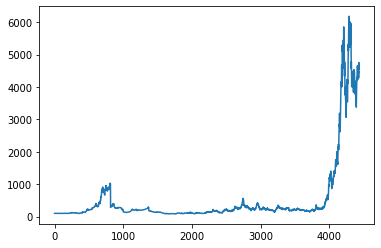

In [17]:
plt.plot(wealthls)
plt.show()